# Data Analytics Capstone Project
### Beth Harvey
### October 22, 2023

# Introduction

As climate change, habitat loss, and disease continue to threaten wildlife throughout the world, detailed research is becoming more and more important. In 2023 alone, the U.S. Fish and Wildlife service took 21 species off of the Endangered Species Act list because they are now considered extinct [6]. Ten of those 21 species are birds. More research and resources are needed to develop effective conservation efforts. 

Some key components of bird conservation research is being able to accurately classify individual specimens, as well as being able to identify potential connections between different species. One of the most valuable resources for an effort like this is an extensive collection of detailed measurements for a wide variety of species.

There are several different families of birds that are difficult to differentiate. One of the more challenging pairs is old-world sparrows and new-world sparrows [2]. Both families are part of the order Passeriformes, but the old-world sparrows make up the Passeridae family, while the new-world sparrows compose the Passerellidae family [4] [3]. New-world sparrows are native to North America, while old-world sparrows are native to Europe, but are also widespread in North America as introduced species [2]. It is important to be able to distinguish if a specimen is an old-world or new-world sparrow before exploring conservation efforts, so that these efforts can focus on helping native species, not introduced ones.

## Project Goals

There are several different families of birds that are difficult to differentiate. One of the more challenging pairs is old-world sparrows and new-world sparrows. 
The end goal of this project is to build a model that can predict what taxonomic order a bird falls into based on several physical measurements. This could help researchers more accurately classify individuals when two or more species are possible. The model will be trained and tested using the AVONET dataset [8], a collective effort by researchers and volunteers to provide measurements of over 90,000 specimens of over 11,000 bird species. 

## Data

The data used for this project is from a large, collective effort known as the AVONET dataset. It is a collection of physical measurements, habitat information, and geographic information for over 90,000 specimens representing over 11,000 species of birds [3]. The majority of individuals measured were museum specimens, though many live birds were included as well. The raw data can be downloaded as Microsoft Excel files from https://figshare.com/s/b990722d72a26b5bfead [2]. The physical measurements are described in the Metadata sheet of Supplementary dataset 1 from the link above, and they are also shown in the figure below [3].

![Illustration of bird showing measurements used](measurements-fig.jpg)

The measurements are:

   1. Beak length from tip to base of skull
   2. Beak length from front edge of nostril to tip
   3. Beak width from front edges of nostrils
   4. Beak depth from front edges of nostrils
   5. Lower leg (tarsus) length
   6. Wing length from bend to end of longest feather 
   7. Wing length from bend to end of outer secondary (shorter) feather
   8. Length from tip of outer secondary (shorter) feather to tip of longest feather
   9. Tail length [3]


The remaining measurements are the mass of the bird and the "hand-wing index," which is calculated using measurements 6 and 8. Information about the bird's habitat, migration pattern(s), eating habits, conservation status, and geographic location are also included [2]. The physical measurements and age, sex, and country are all from the AVONET Raw Data sheet of Supplemental dataset 1, and the geographic and behavior information come from the AVONET3 BirdTree sheet of the same file [2]. The categorical information from the BirdTree sheet was matched to the appropriate raw data record to create the additional features. This sheet was chosen over the AVONET1 BirdLife and AVONET2 eBird sheets because it had a match for 90,303 of the 90,372 raw records, which was the highest of the three. The physical measurements shown in the figure above and the mass and hand-wing index are the key features used for this model.

In [1]:
# Import modules
import pandas as pd
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data
avonet_raw = pd.read_csv('avonet_raw.csv')
birdlife = pd.read_csv('avonet1_birdlife.csv')

# Data Inspection and Cleaning

### Merging Datasets

In [3]:
# Get desired additional features from BirdTree file
birdlife_features = birdlife[['Species1', 'Family1', 'Order1', 'Mass', 'Habitat', 'Habitat.Density', 'Migration', 
                              'Trophic.Level', 'Trophic.Niche','Primary.Lifestyle', 'Centroid.Latitude', 
                             'Centroid.Longitude']]

# Rename column to match avonet_raw column for merging
birdlife_features = birdlife_features.rename(columns = {'Species1': 'Species1_BirdLife', 'Family1': 'Family',
                                                       'Order1': 'Order'})

In [4]:
# Merge dataframes on Species3_BirdTree
avonet = pd.merge(avonet_raw, birdlife_features, how = 'inner', on = 'Species1_BirdLife')
avonet.head()

,Avibase.ID,Species1_BirdLife,Species2_eBird,eBird.species.group,Species3_BirdTree,Data.type,Source,Specimen.number,Sex,Age,...,Order,Mass,Habitat,Habitat.Density,Migration,Trophic.Level,Trophic.Niche,Primary.Lifestyle,Centroid.Latitude,Centroid.Longitude
0,AVIBASE-B3F5E5E2,Abeillia abeillei,Abeillia abeillei,Abeillia abeillei,Abeillia abeillei,1.0,NHMUK,11.4.1890,F,0.0,...,Caprimulgiformes,2.7,Forest,2,1.0,Herbivore,Nectarivore,Aerial,15.29,-89.79
1,AVIBASE-B3F5E5E2,Abeillia abeillei,Abeillia abeillei,Abeillia abeillei,Abeillia abeillei,1.0,NHMUK,12.23.1890,F,0.0,...,Caprimulgiformes,2.7,Forest,2,1.0,Herbivore,Nectarivore,Aerial,15.29,-89.79
2,AVIBASE-B3F5E5E2,Abeillia abeillei,Abeillia abeillei,Abeillia abeillei,Abeillia abeillei,1.0,NHMUK,1913.3.20.972,M,0.0,...,Caprimulgiformes,2.7,Forest,2,1.0,Herbivore,Nectarivore,Aerial,15.29,-89.79
3,AVIBASE-B3F5E5E2,Abeillia abeillei,Abeillia abeillei,Abeillia abeillei,Abeillia abeillei,1.0,NHMUK,87.3.22.1574,M,0.0,...,Caprimulgiformes,2.7,Forest,2,1.0,Herbivore,Nectarivore,Aerial,15.29,-89.79
4,AVIBASE-B3F5E5E2,Abeillia abeillei,Abeillia abeillei,Abeillia abeillei,Abeillia abeillei,1.0,NHMUK,NaN,M,0.0,...,Caprimulgiformes,2.7,Forest,2,1.0,Herbivore,Nectarivore,Aerial,15.29,-89.79


In [5]:
# View size of dataset
avonet.shape

(90003, 37)

In [6]:
# Get just the sparrow species (Passerellidae and Passeridae families)
sparrows_raw = avonet[avonet.Family.isin(['Passerellidae', 'Passeridae'])]
sparrows_raw.shape

(1525, 37)

In [7]:
# Drop irrelevant columns
sparrows = sparrows_raw.drop(columns = ['Avibase.ID', 'Species1_BirdLife', 'Species2_eBird', 'eBird.species.group', 
                                    'Species3_BirdTree', 'Data.type', 'Source', 'Specimen.number', 'Locality', 
                                    'Country_WRI','Country', 'Measurer', 'Protocol', 'Publication', 'Order'], axis = 1)

In [8]:
sparrows.head()

,Sex,Age,Beak.Length_Culmen,Beak.Length_Nares,Beak.Width,Beak.Depth,Tarsus.Length,Wing.Length,Kipps.Distance,Secondary1,...,Family,Mass,Habitat,Habitat.Density,Migration,Trophic.Level,Trophic.Niche,Primary.Lifestyle,Centroid.Latitude,Centroid.Longitude
1415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Passerellidae,24.8,Forest,1,1.0,Herbivore,Omnivore,Insessorial,5.90,-71.73
1836,U,0.0,16.5,8.2,5.0,5.9,23.3,67.0,4.0,63.0,...,Passerellidae,27.1,Shrubland,2,1.0,Herbivore,Omnivore,Generalist,17.14,-96.97
1837,M,0.0,15.0,9.7,5.6,6.4,25.3,69.0,8.3,60.7,...,Passerellidae,27.1,Shrubland,2,1.0,Herbivore,Omnivore,Generalist,17.14,-96.97
1838,F,0.0,17.3,10.6,5.6,6.9,23.4,67.0,4.5,62.5,...,Passerellidae,27.1,Shrubland,2,1.0,Herbivore,Omnivore,Generalist,17.14,-96.97
1839,U,0.0,14.9,9.1,4.4,5.9,23.8,65.5,5.6,59.9,...,Passerellidae,27.1,Shrubland,2,1.0,Herbivore,Omnivore,Generalist,17.14,-96.97


### Inspect Dataset

In [9]:
# View shape and size of dataset
sparrows.shape

(1525, 22)

In [10]:
sparrows.describe(include='all')

,Sex,Age,Beak.Length_Culmen,Beak.Length_Nares,Beak.Width,Beak.Depth,Tarsus.Length,Wing.Length,Kipps.Distance,Secondary1,...,Family,Mass,Habitat,Habitat.Density,Migration,Trophic.Level,Trophic.Niche,Primary.Lifestyle,Centroid.Latitude,Centroid.Longitude
count,1506,1506.000000,1266.000000,976.000000,1105.000000,1221.000000,1421.000000,1496.000000,1059.000000,1057.000000,...,1525,1525.000000,1514,1525.000000,1525.000000,1525,1525,1525,1525.000000,1525.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,NaN,8,NaN,NaN,3,4,3,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Passerellidae,NaN,Shrubland,NaN,NaN,Omnivore,Omnivore,Generalist,NaN,NaN
freq,725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1196,NaN,572,NaN,NaN,722,881,827,NaN,NaN
mean,NaN,0.035857,14.918325,9.381557,5.429774,6.908518,23.271780,73.000334,12.790463,61.319111,...,NaN,26.675541,NaN,1.979016,1.296393,NaN,NaN,NaN,10.846420,-50.828466
std,NaN,0.185994,2.417400,1.357792,0.951320,1.131172,4.198714,10.678472,7.314766,8.530690,...,NaN,9.004711,NaN,0.813005,0.631641,NaN,NaN,NaN,23.977397,59.567799
min,NaN,0.000000,9.200000,5.100000,2.900000,3.600000,11.400000,50.000000,1.900000,39.900000,...,NaN,10.900000,NaN,1.000000,1.000000,NaN,NaN,NaN,-27.280000,-144.870000
25%,NaN,0.000000,13.300000,8.500000,4.800000,6.100000,20.000000,66.000000,8.000000,55.200000,...,NaN,20.300000,NaN,1.000000,1.000000,NaN,NaN,NaN,-12.800000,-84.140000
50%,NaN,0.000000,14.700000,9.200000,5.300000,6.900000,23.400000,72.000000,10.800000,61.200000,...,NaN,24.200000,NaN,2.000000,1.000000,NaN,NaN,NaN,6.400000,-73.180000
75%,NaN,0.000000,16.400000,10.300000,6.000000,7.700000,26.300000,79.000000,15.450000,66.900000,...,NaN,31.600000,NaN,3.000000,1.000000,NaN,NaN,NaN,32.890000,-58.420000


In [11]:
sparrows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1525 entries, 1415 to 88445
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sex                 1506 non-null   object 
 1   Age                 1506 non-null   float64
 2   Beak.Length_Culmen  1266 non-null   float64
 3   Beak.Length_Nares   976 non-null    float64
 4   Beak.Width          1105 non-null   float64
 5   Beak.Depth          1221 non-null   float64
 6   Tarsus.Length       1421 non-null   float64
 7   Wing.Length         1496 non-null   float64
 8   Kipps.Distance      1059 non-null   float64
 9   Secondary1          1057 non-null   float64
 10  Hand-wing.Index     1057 non-null   float64
 11  Tail.Length         1388 non-null   float64
 12  Family              1525 non-null   object 
 13  Mass                1525 non-null   float64
 14  Habitat             1514 non-null   object 
 15  Habitat.Density     1525 non-null   int64  
 16  Migrati

13 of the columns contain missing data, which will need to be addressed before building a model.

### Cleaning Data

In [12]:
columns = sparrows.columns

# Determine percent of missing data in each column
# Drop columns with 30% or more missing data
for i in columns:
    missing = sparrows[i].isnull().sum()/len(sparrows)
    if missing >= 0.3:
        sparrows.drop(i, axis = 1, inplace = True)

In [13]:
sparrows.columns

Index(['Sex', 'Age', 'Beak.Length_Culmen', 'Beak.Width', 'Beak.Depth',
       'Tarsus.Length', 'Wing.Length', 'Tail.Length', 'Family', 'Mass',
       'Habitat', 'Habitat.Density', 'Migration', 'Trophic.Level',
       'Trophic.Niche', 'Primary.Lifestyle', 'Centroid.Latitude',
       'Centroid.Longitude'],
      dtype='object')

In [14]:
# Change Sex feature to numeric type for inference
dictionary = {'M':0, 'F':1, 'U': 2}
sparrows.replace({'Sex': dictionary}, inplace = True)

In [15]:
# Drop rows with missing Habitat data
# There are very few missing values for this feature, so it won't decrease the dataset much
sparrows.dropna(subset=['Habitat'], inplace = True, 
              ignore_index = True)

All categorical missing values have been addressed.

In [16]:
# Impute missing numeric values using KNN imputation
# Use only numeric features with missing values
sparrows_missing = sparrows[['Sex', 'Age', 'Beak.Length_Culmen', 'Beak.Width', 'Beak.Depth', 'Tarsus.Length', 'Wing.Length',
                          'Tail.Length']]

# Create imputer object
knn_imputer = KNNImputer(n_neighbors = 5)

# Fit and transform numeric data with imputer
sparrows_num_trans = knn_imputer.fit_transform(sparrows_missing)

In [17]:
# Convert transformed numeric data to DataFrame
sparrows_num_df = pd.DataFrame(sparrows_num_trans, columns = ['Sex', 'Age', 'Beak.Length_Culmen', 'Beak.Width', 'Beak.Depth', 
                                                          'Tarsus.Length', 'Wing.Length', 'Tail.Length'])
sparrows_num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sex                 1514 non-null   float64
 1   Age                 1514 non-null   float64
 2   Beak.Length_Culmen  1514 non-null   float64
 3   Beak.Width          1514 non-null   float64
 4   Beak.Depth          1514 non-null   float64
 5   Tarsus.Length       1514 non-null   float64
 6   Wing.Length         1514 non-null   float64
 7   Tail.Length         1514 non-null   float64
dtypes: float64(8)
memory usage: 94.8 KB


All missing numeric values have been filled in through KNN imputation.

In [18]:
# Replace original columns with imputed columns
col_names = ['Sex', 'Age', 'Beak.Length_Culmen', 'Beak.Width', 'Beak.Depth', 'Tarsus.Length', 'Wing.Length', 
             'Tail.Length']

for col in col_names:
    sparrows[col] = sparrows_num_df[col]

In [19]:
# Change data type of Sex, Age, Habitat.Density and Migration to int
feature_list = ['Sex', 'Age', 'Habitat.Density', 'Migration']

for feature in feature_list:
    sparrows[feature] = sparrows[feature].astype(int)

In [20]:
sparrows.columns

Index(['Sex', 'Age', 'Beak.Length_Culmen', 'Beak.Width', 'Beak.Depth',
       'Tarsus.Length', 'Wing.Length', 'Tail.Length', 'Family', 'Mass',
       'Habitat', 'Habitat.Density', 'Migration', 'Trophic.Level',
       'Trophic.Niche', 'Primary.Lifestyle', 'Centroid.Latitude',
       'Centroid.Longitude'],
      dtype='object')

In [21]:
# Rename columns to all lowercase, no periods
sparrows.columns = ['sex', 'age', 'beak_length_culmens', 'beak_width', 'beak_depth', 'tarsus_length', 'wing_length',
                  'tail_length', 'family', 'mass', 'habitat', 'habitat_density', 'migration', 'trophic_level', 
                    'trophic_niche', 'primary_lifestyle', 'centroid_lat', 'centroid_long']

# Exploratory Data Analysis

In [22]:
# View and inspect final dataset
sparrows.head()

,sex,age,beak_length_culmens,beak_width,beak_depth,tarsus_length,wing_length,tail_length,family,mass,habitat,habitat_density,migration,trophic_level,trophic_niche,primary_lifestyle,centroid_lat,centroid_long
0,0,0,14.927649,5.428154,6.904628,23.309142,73.014141,66.838562,Passerellidae,24.8,Forest,1,1,Herbivore,Omnivore,Insessorial,5.90,-71.73
1,2,0,16.500000,5.000000,5.900000,23.300000,67.000000,75.000000,Passerellidae,27.1,Shrubland,2,1,Herbivore,Omnivore,Generalist,17.14,-96.97
2,0,0,15.000000,5.600000,6.400000,25.300000,69.000000,80.000000,Passerellidae,27.1,Shrubland,2,1,Herbivore,Omnivore,Generalist,17.14,-96.97
3,1,0,17.300000,5.600000,6.900000,23.400000,67.000000,70.000000,Passerellidae,27.1,Shrubland,2,1,Herbivore,Omnivore,Generalist,17.14,-96.97
4,2,0,14.900000,4.400000,5.900000,23.800000,65.500000,72.000000,Passerellidae,27.1,Shrubland,2,1,Herbivore,Omnivore,Generalist,17.14,-96.97


In [23]:
# Confirm that there are no missing values remaining and all data types are correct
sparrows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  1514 non-null   int64  
 1   age                  1514 non-null   int64  
 2   beak_length_culmens  1514 non-null   float64
 3   beak_width           1514 non-null   float64
 4   beak_depth           1514 non-null   float64
 5   tarsus_length        1514 non-null   float64
 6   wing_length          1514 non-null   float64
 7   tail_length          1514 non-null   float64
 8   family               1514 non-null   object 
 9   mass                 1514 non-null   float64
 10  habitat              1514 non-null   object 
 11  habitat_density      1514 non-null   int64  
 12  migration            1514 non-null   int64  
 13  trophic_level        1514 non-null   object 
 14  trophic_niche        1514 non-null   object 
 15  primary_lifestyle    1514 non-null   o

In [24]:
# View summary statistics for all features
sparrows.describe(include = 'all')

,sex,age,beak_length_culmens,beak_width,beak_depth,tarsus_length,wing_length,tail_length,family,mass,habitat,habitat_density,migration,trophic_level,trophic_niche,primary_lifestyle,centroid_lat,centroid_long
count,1514.000000,1514.000000,1514.000000,1514.000000,1514.000000,1514.000000,1514.000000,1514.000000,1514,1514.000000,1514,1514.000000,1514.000000,1514,1514,1514,1514.000000,1514.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,8,NaN,NaN,3,4,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Passerellidae,NaN,Shrubland,NaN,NaN,Omnivore,Omnivore,Generalist,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1196,NaN,572,NaN,NaN,722,881,827,NaN,NaN
mean,0.727213,0.035667,14.932989,5.412097,6.892092,23.330326,73.025078,66.674738,NaN,26.698679,NaN,1.971598,1.298547,NaN,NaN,NaN,10.858606,-51.448811
std,0.792537,0.185520,2.274086,0.855245,1.061699,4.058856,10.617659,13.271252,NaN,9.029250,NaN,0.811264,0.633425,NaN,NaN,NaN,24.061622,59.329576
min,0.000000,0.000000,9.200000,2.900000,3.600000,11.400000,50.000000,37.000000,NaN,10.900000,NaN,1.000000,1.000000,NaN,NaN,NaN,-27.280000,-144.870000
25%,0.000000,0.000000,13.500000,4.900000,6.165000,20.300000,66.000000,57.000000,NaN,20.300000,NaN,1.000000,1.000000,NaN,NaN,NaN,-12.800000,-84.140000
50%,1.000000,0.000000,14.870000,5.300000,6.900000,23.400000,72.000000,65.000000,NaN,24.200000,NaN,2.000000,1.000000,NaN,NaN,NaN,6.370000,-73.265000
75%,1.000000,0.000000,16.300000,5.900000,7.600000,26.200000,78.500000,75.000000,NaN,31.900000,NaN,3.000000,1.000000,NaN,NaN,NaN,32.950000,-58.420000


In [25]:
# View value counts for categorical columns
sparrows.family.value_counts()

family
Passerellidae    1196
Passeridae        318
Name: count, dtype: int64

This is the independent variable. Because the two classes have very different values counts, this is an imbalanced dataset.

In [26]:
sparrows.habitat.value_counts()

habitat
Shrubland         572
Forest            557
Woodland          122
Grassland         117
Rock               45
Human Modified     42
Wetland            39
Desert             20
Name: count, dtype: int64

**Habitat Definitions** [7]

| **Habitat** | **Definition** |
| --- | --- |
| Shrubland | Low, bushy habitats |
| Forest | Tall tree-dominated vegetation with mostly closed canopy |
| Woodland | Medium-height tree-dominated vegetation | 
| Grassland | Open grass-dominated landscape |
| Rock | Rocky surface with little to no vegetation | 
| Human Modified | Urban landscapes, gardens, intensive agriculture | 
| Wetland | Freshwater aquatic habitat | 
| Desert | Open, arid habitat with very sparse vegetation |

In [27]:
sparrows.trophic_level.value_counts()

trophic_level
Omnivore     722
Herbivore    683
Carnivore    109
Name: count, dtype: int64

**Trophic Level Definitions** [7]

| **Trophic Level** | **Definition** |
| --- | --- |
| Omnivore | Obtaining nutrition from multiple levels roughly equally |
| Herbivore | Obtaining at least 70\% of food resources from plants |
| Carnivore | Obtaining at least 70\% of food resources from live animals |

In [28]:
sparrows.trophic_niche.value_counts()

trophic_niche
Omnivore       881
Granivore      407
Invertivore    199
Frugivore       27
Name: count, dtype: int64

**Trophic Niche Definitions** [7]

| **Trophic Niche** | **Definition** |
|---|---|
| Omnivore | Obtaining nutrition from multiple levels roughly equally |
| Granivore | Obtaining at least 60\% of food resources from seeds or nuts |
| Invertivore | Obtaining at least 60\% of food resources from invertebrates |
| Frugivore | Obtaining at least 60\% of food resources from fruit |

In [29]:
sparrows.primary_lifestyle.value_counts()

primary_lifestyle
Generalist     827
Terrestrial    406
Insessorial    281
Name: count, dtype: int64

**Primary Lifestyle Definitions** [7]

| **Primary Lifestyle** | **Definition** |
|---|---|
| Generalist | Spending time in multiple different lifestyle classes |
| Terrestrial | Spending majority of time on the ground |
| Insessorial | Spending majority of time perching above the ground |

In [30]:
# View number of unique values per feature
sparrows.nunique()

sex                      3
age                      2
beak_length_culmens    268
beak_width             207
beak_depth             191
tarsus_length          241
wing_length            143
tail_length            215
family                   2
mass                   121
habitat                  8
habitat_density          3
migration                3
trophic_level            3
trophic_niche            4
primary_lifestyle        3
centroid_lat           183
centroid_long          184
dtype: int64

## Visualizations

### Univariate Analysis

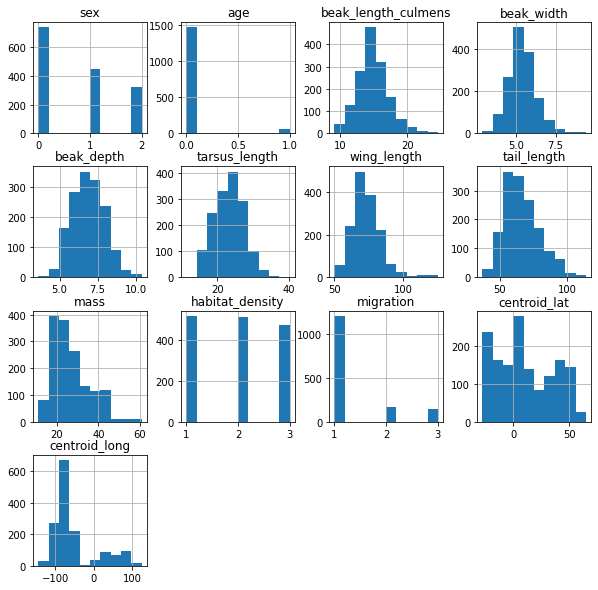

In [31]:
# View histograms of all numeric features
sparrows.hist(figsize = (10, 10))
plt.show()

All continuous variables except centroid_lat and centroid_long are roughly normally distributed. Both of those features are bimodally distributed. Habitat_density is uniformly distributed between the three discrete categories. Sex, age, and migration are all right-skewed, indicating that there are more males than females or unknown specimens, most of the specimens were juveniles, and the majority of specimens do not migrate.

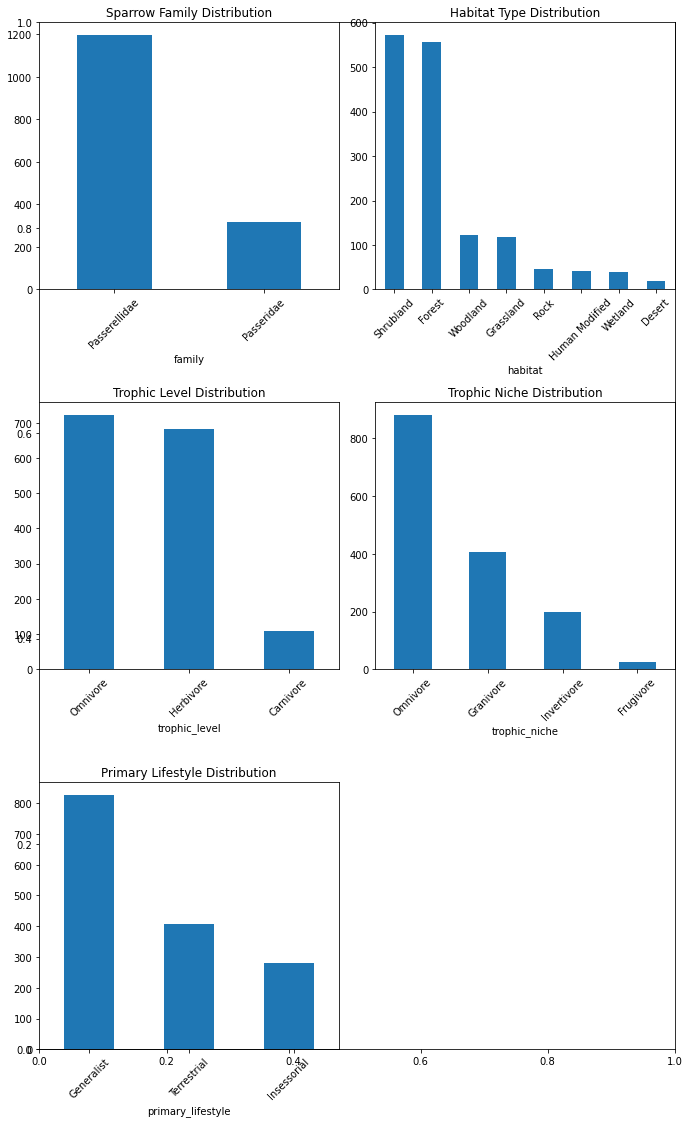

In [32]:
# View distributions of categorical features
fig, axes = plt.subplots(figsize=(10, 16))

plt.subplot(321)
sparrows.family.value_counts().plot(kind = 'bar', title = 'Sparrow Family Distribution')
plt.xticks(rotation = 45)

plt.subplot(322)
sparrows.habitat.value_counts().plot(kind = 'bar', title = 'Habitat Type Distribution')
plt.xticks(rotation = 45)

plt.subplot(323)
sparrows.trophic_level.value_counts().plot(kind = 'bar', title = 'Trophic Level Distribution')
plt.xticks(rotation = 45)

plt.subplot(324)
sparrows.trophic_niche.value_counts().plot(kind = 'bar', title = 'Trophic Niche Distribution')
plt.xticks(rotation = 45)

plt.subplot(325)
sparrows.primary_lifestyle.value_counts().plot(kind = 'bar', title = 'Primary Lifestyle Distribution')
plt.xticks(rotation = 45)

fig.tight_layout()
plt.show()

The family variable is heavily skewed towards Passerellidae, which will need to be accounted for when splitting into train and test sets. The majority of species included in this dataset live in primarily shrubland or forest habitats. The vast majority of specimens are primarily omnivores or herbivores, while a few are carnivores. Additionally, most of them also get the majority of their food resources from varied sources. Finally, most of the sparrows live a generalist lifestyle, spending their time in a wide variety of settings rather than any one specific one.

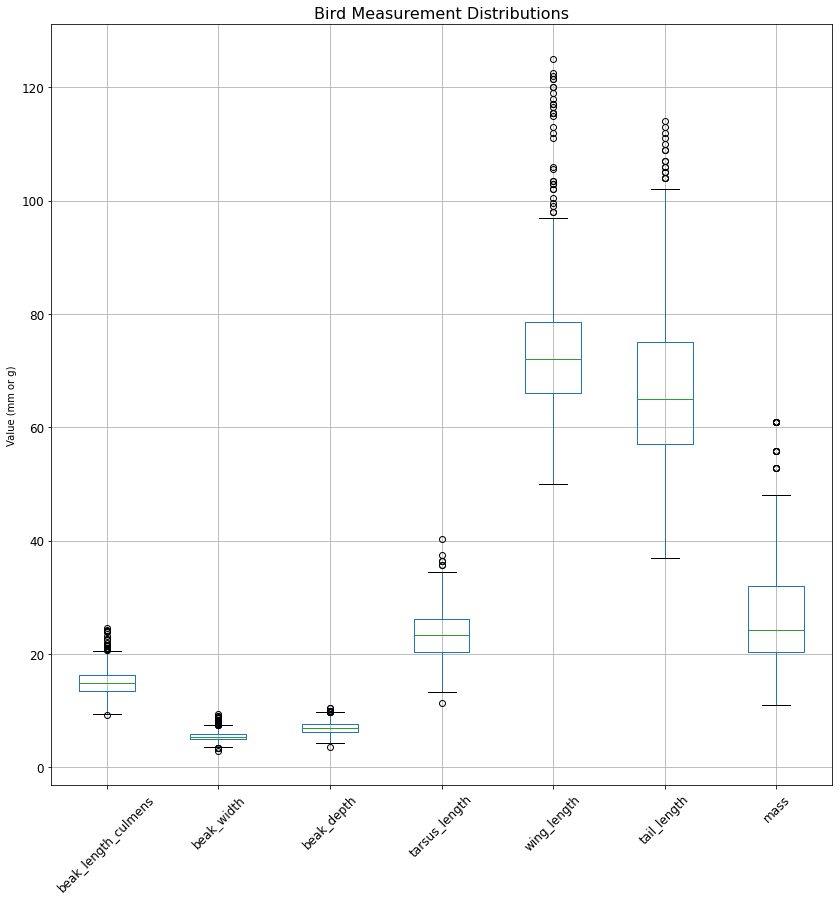

In [33]:
# View boxplots of continuous numeric variables
# Centroid lat and long to be plotted separately because the scales are very different than the other variables
sparrows.boxplot(column = ['beak_length_culmens', 'beak_width', 'beak_depth', 'tarsus_length', 'wing_length',
                          'tail_length', 'mass'], fontsize = 12, rot = 45, figsize = (14, 14))
plt.title('Bird Measurement Distributions', fontsize = 16)
plt.ylabel('Value (mm or g)')
plt.show()

Wing length, tarsus length, and mass have the widest ranges. This makes sense because the beak measurements are much smaller values, so they have a smaller range of values. The wings and tail tend to be the longest measurements of a bird.

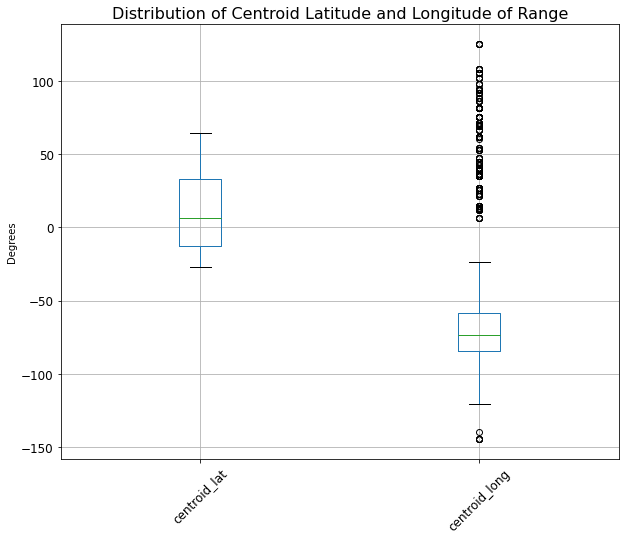

In [34]:
# View boxplots of centroid_lat and centroid_long
sparrows.boxplot(column = ['centroid_lat', 'centroid_long'], fontsize = 12, rot = 45, figsize = (10, 8))
plt.title('Distribution of Centroid Latitude and Longitude of Range', fontsize = 16)
plt.ylabel('Degrees')
plt.show()

Centroid longitude has a much bigger range of values than centroid latitude. This indicates that the birds surveyed are found all around the world, but not too far north or south. This makes sense, since sparrows are not suited for extremely cold environments.

### Multivariate Analysis

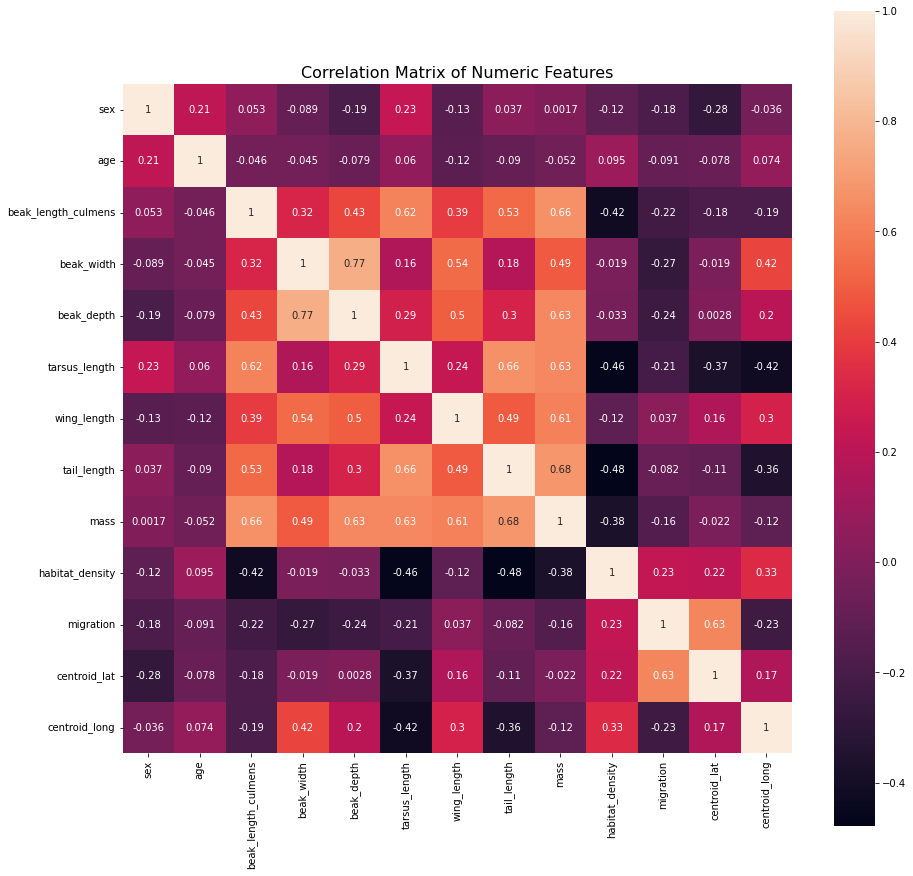

In [35]:
# Use a heatmap to check for multicollinearity of numeric values
plt.figure(figsize = (15, 15))
corr = sparrows.corr(numeric_only = True)
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of Numeric Features', fontsize = 16)
plt.show()

The pairs with the highest correlation are beak width/beak depth, tail length/mass, and beak length culmens/mass. However, none of the correlations are above 0.8, so the variables may still be usable together.

[]

<Figure size 1440x1440 with 0 Axes>

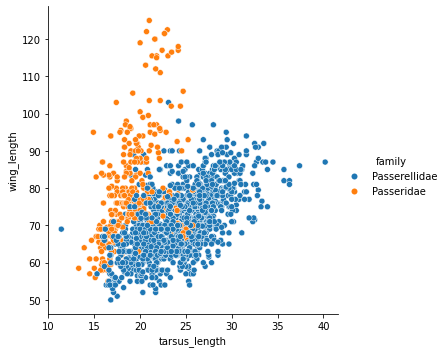

In [38]:
# View relational plot for multiple variable combinations

sns.relplot(x = 'tarsus_length', y = 'wing_length', hue = 'family', data = sparrows)
plt.plot()

### References

1. Bhattarai, A., T., F.: Knnimputer. https://github.com/scikit-learn/
scikit-learn/blob/093e0cf14/sklearn/impute/_knn.py#L20 (2014), accessed
on October 31, 2023
2. Camfield, A.: Emberizidae buntings, american sparrows, and relatives. https://
animaldiversity.org/accounts/Emberizidae/ (2004), accessed on November 6,
2023
3. Cornell: New world sparrows—passerellidae. https://www.allaboutbirds.org/
guide/browse/taxonomy/Passerellidae (2023), accessed on November 6, 2023
4. Cornell: Old world sparrows—passeridae. https://www.allaboutbirds.org/
guide/browse/taxonomy/Passeridae (2023), accessed on November 6, 2023
5. Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O.,
Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A.,
Cournapeau, D., Brucher, M., Perrot, M., Duchesnay, E.: Scikit-learn: Machine
learning in Python. Journal of Machine Learning Research 12, 2825–2830 (2011)
6. Schuldheisz, C.: Fish and wildlife service delists 21 species from the endangered
species act due to extinction. https://www.fws.gov/press-release/2023-10/
21-species-delisted-endangered-species-act-due-extinction (2023), ac-
cessed on October 18, 2023
7. Tobias: Avonet: morphological, ecological and geographical data for all birds. https:
//figshare.com/s/b990722d72a26b5bfead (2022), accessed on October 18, 2023
8. Tobias, J.A., Sheard, C., Pigot, A.L., Devenish, A.J.M., Yang, J., Sayol, F., Neate-
Clegg, M.H.C., Alioravainen, N., Weeks, T.L., Barber, R.A., Walkden, P.A., Mac-
Gregor, H.E.A., Jones, S.E.I., Vincent, C., Phillips, A.G., Marples, N.M., Monta ̃no-
Centellas, F.A., Leandro-Silva, V., Claramunt, S., Darski, B., Freeman, B.G., Breg-
man, T.P., Cooney, C.R., Hughes, E.C., Capp, E.J.R., Varley, Z.K., Friedman,
N.R., Korntheuer, H., Corrales-Vargas, A., Trisos, C.H., Weeks, B.C., Hanz, D.M.,
T ̈opfer, T., Bravo, G.A., Remeˇs, V., Nowak, L., Carneiro, L.S., Moncada R., A.J.,
Matysiokov ́a, B., Baldassarre, D.T., Mart ́ınez-Salinas, A., Wolfe, J.D., Chapman,
P.M., Daly, B.G., Sorensen, M.C., Neu, A., Ford, M.A., Mayhew, R.J., Fabio Sil-
veira, L., Kelly, D.J., Annorbah, N.N.D., Pollock, H.S., Grabowska-Zhang, A.M.,
McEntee, J.P., Carlos T. Gonzalez, J., Meneses, C.G., Mu ̃noz, M.C., Powell, L.L.,
Jamie, G.A., Matthews, T.J., Johnson, O., Brito, G.R.R., Zyskowski, K., Crates,
R., Harvey, M.G., Jurado Zevallos, M., Hosner, P.A., Bradfer-Lawrence, T., Maley,
J.M., Stiles, F.G., Lima, H.S., Provost, K.L., Chibesa, M., Mashao, M., Howard,
J.T., Mlamba, E., Chua, M.A.H., Li, B., G ́omez, M.I., Garc ́ıa, N.C., P ̈ackert,
M., Fuchs, J., Ali, J.R., Derryberry, E.P., Carlson, M.L., Urriza, R.C., Brzeski,
K.E., Prawiradilaga, D.M., Rayner, M.J., Miller, E.T., Bowie, R.C.K., Lafontaine,
R.M., Scofield, R.P., Lou, Y., Somarathna, L., Lepage, D., Illif, M., Neuschulz,
E.L., Templin, M., Dehling, D.M., Cooper, J.C., Pauwels, O.S.G., Analuddin, K.,
Fjelds ̊a, J., Seddon, N., Sweet, P.R., DeClerck, F.A.J., Naka, L.N., Brawn, J.D.,
Aleixo, A., B ̈ohning-Gaese, K., Rahbek, C., Fritz, S.A., Thomas, G.H., Schleuning,
M.: Avonet: morphological, ecological and geographical data for all birds. Ecology
Bird Identification Model 7
Letters 25(3), 581–597 (2022). https://doi.org/https://doi.org/10.1111/ele.13898,
https://onlinelibrary.wiley.com/doi/abs/10.1111/ele.13898


In [37]:
# Display system data
from watermark import watermark
print(watermark())

Last updated: 2023-11-06T20:52:53.955032-06:00

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 8.2.0

Compiler    : Clang 12.0.0 
OS          : Darwin
Release     : 23.0.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

